## Lecture 2.4: Optimization

### Recap: Models and Losses

Model: $f_{\theta}$&ensp;&ensp;&ensp;&ensp;$L(\theta)\ =\ L(\theta\ |\ \mathcal{D})\ =\ \mathbb{E}_{(\text{x},\ \text{y})\sim\mathcal{D}}[l(\theta\ |\ \text{x},\ \text{y})]$

Parameters: $\theta\ =\ (\text{W},\ \text{b})$ </br>
$x\ \rightarrow\ \text{Linear}\ \text{Wx}\ +\ \text{b}\ \rightarrow\ y$

* Low Loss - good
* High Loss - bad
* Loss function over the full dataset $\mathcal{D}$

### Training a Model

Find: </br>
&ensp;&ensp;&ensp;&ensp;$\theta^{*}\ =\ \underset{\theta}{\text{arg min}}\ L(\theta\ |\ \mathcal{D})$

### Gradient Descent

Deep Learning uses **gradient descent**:
* Updates parameters via the negative gradient
* Iterative method

Update rule: </br>
&ensp;&ensp;&ensp;&ensp;$\theta'\ =\ \theta\ -\ \epsilon[\nabla_{\theta}L(\theta)]^{\top}$

where $\epsilon$ is the learning rate

**Pseudocode**

for iteration in range(n):

&ensp;&ensp;&ensp;&ensp;J = $\nabla L(\theta)$

&ensp;&ensp;&ensp;&ensp;$\theta\ =\ \theta\ -\ \epsilon * \text{J.mT}$

### Initialization

How should we choose the initial parameters $\theta$?

Random initialization:
* Gaussian&ensp;&ensp;$\mathcal{N}(\mu,\ \sigma)$
* Uniform&ensp;&ensp;$\mathcal{U}(a,\ b)$

**Pseudocode: Gradient Descent** </br>

$\theta\ \sim\ \text{Init}$

for iterations in range(n):

&ensp;&ensp;&ensp;&ensp;J = $\nabla L(\theta)$

&ensp;&ensp;&ensp;&ensp;$\theta\ =\ \theta\ -\ \epsilon\ *\ \text{J.mT}$

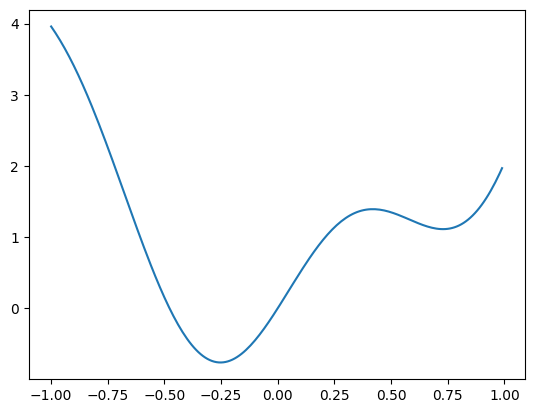

In [4]:
import matplotlib.pyplot as plt
import torch

def f(x: torch.Tensor) -> torch.Tensor:
    return 3*x**2+torch.sin(5*x)

def grad_f(x: torch.Tensor) -> torch.Tensor:
    return 6*x+5*torch.cos(5*x)

# plt.plot(torch.arange(-2, 2, 0.01), f(torch.arange(-2, 2, 0.01)))
plt.plot(torch.arange(-1, 1, 0.01), f(torch.arange(-1, 1, 0.01)))

tensor([1.0502]) tensor([0.7293])


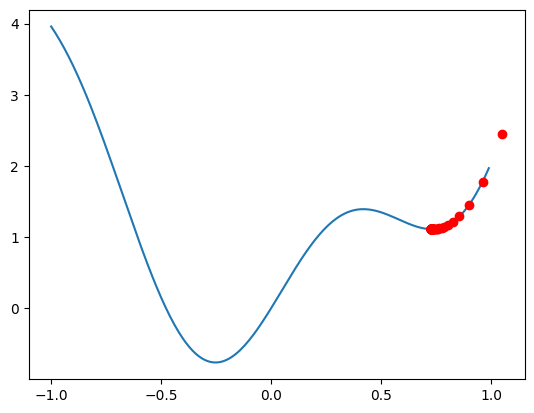

In [18]:
x = torch.randn(1)
# print(x)

all_x = []
for _ in range(100):
    # x = x - 0.1 * grad_f(x)
    x = x - 0.01 * grad_f(x)
    all_x.append(x)
# print(x)
plt.plot(torch.arange(-1, 1, 0.01), f(torch.arange(-1, 1, 0.01)))
plt.plot(torch.stack(all_x), f(torch.stack(all_x)), 'ro')
print(all_x[0], all_x[-1])
    # plt.plot(x, f(x), 'ro')

### Gradient Descent: What can go wrong?

Best Case: we iterate to the global minima

Initialization: We iterate to the local minima
* Known as bumpy loss landscape
* Get stuck in local minima

Learning Rate too low
* slow training

Learning Rate too high
* covnergence
* extreme cases - NaNs
* slow convergence

### Gradient: Linear Regression

Simplified model: </br>
&ensp;&ensp;&ensp;&ensp;$\hat{y}\ =\ \text{Wx}\ +\ b\ =\ \text{w}^{\top}\text{x}\ +\ b$

Loss Function: </br>
&ensp;&ensp;&ensp;&ensp;$L(\theta\ |\ \mathcal{D})$

&ensp;&ensp;&ensp;&ensp;$=\ E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[l(\theta\ |\ \text{x},\ y)]$

&ensp;&ensp;&ensp;&ensp;$=\ E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[(\text{w}^{\top}\text{x}\ +\ b\ -\ y)^{2}]$

Compute the gradient of the loss: </br>
&ensp;&ensp;&ensp;&ensp;$\nabla L(\theta)$

Gradient: </br>
&ensp;&ensp;&ensp;&ensp;$\nabla_{\text{w}} L(\theta\ |\ \mathcal{D})$

&ensp;&ensp;&ensp;&ensp;$=\ \nabla_{\text{w}} E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[l(\theta\ |\ \text{x},\ y)]$

&ensp;&ensp;&ensp;&ensp;$=\ E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[\nabla_{\text{w}}l(\theta\ |\ \text{x},\ y)]$

&ensp;&ensp;&ensp;&ensp;$=\ E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[\nabla_{\text{w}}(\text{w}^{\top}\text{x}\ +\ b\ -\ y)^{2}]$

&ensp;&ensp;&ensp;&ensp;$=\ 2E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[(\text{w}^{\top}\text{x}\ +\ b\ -\ y)\nabla_{\text{w}}\text{w}^{\top}\text{x}]$

&ensp;&ensp;&ensp;&ensp;$=\ 2E_{\text{x},\ \text{y}\ \sim\ \mathcal{D}}[(\text{w}^{\top}\text{x}\ +\ b\ -\ y)\text{x}^{\top}]$

### Gradient: In General

General Linear Regression Model: </br>
&ensp;&ensp;&ensp;&ensp;$l(\theta\ |\ \text{x},\ \text{y})\ =\ (\text{Wx}\ +\ \text{b}\ -\ \text{y})^{2}$

Binary Logistic Regression: </br>
&ensp;&ensp;&ensp;&ensp;$l(\theta\ |\ \text{x},\ \text{y})\ =\ y\ \text{log}\ \sigma(\text{Wx}\ +\ \text{b})\ +\ (1\ -\ \text{y})\ \text{log}(1\ -\ \sigma(\text{Wx}\ +\ \text{b}))$

Multi-class Logistic Regression: </br>
&ensp;&ensp;&ensp;&ensp;$l(\theta\ |\ \text{x},\ \text{y})\ =\ \text{log softmax}(\text{Wx}\ +\ \text{b})_{y}$

**General gradients** </br>
Gradients quickly get quite complicated

### Optimization - TL;DR

Gradient descent (and variants): workhorse for 99% of deep learning

$$
\theta\ \sim\ \text{Init} \\
\text{for iteration in range(n):} \\
\ \ \ \ \text{J}\ =\ \nabla L(\theta) \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \theta\ =\ \theta\ -\ \epsilon\ *\ \text{J.mT} \\
